# **What is an API?**

APIs (Application Programming Interface) allow two programs to "talk" to each other. We can think of an API as a set of functions that return data in a predefined format. Many applications today use web APIs, which are APIs available over the internet, to retrieve their data.

Examples in everyday life:
* Sign-in with Google on other sites
* Pay with PayPal or Venmo when online shopping
* Travel booking sites like Kayak, Wanderu, etc.

## **How to Use an API**

While every API is different, there are usually four steps that we need to follow when using an API:

1. Sign up for an API key
2. Read the Documentation
3. Call the API
4. Extract the Data

APIs typically send us data in the form of JSON - a data interchange format. Here are some examples of what JSON data looks like:

* [JSON Example 1](https://tinyurl.com/jsonExample1)
* [JSON Example 2](https://tinyurl.com/jsonExample2)
* [JSON Example 3](https://tinyurl.com/jsonExample4)

# **Using APIs for Weather Data**

In this document, we walk through how to use an API to get current weather data. We will be using OpenWeatherMap, a simple and free API that gives us weather data for any location on Earth!


## **1. Sign up for an API key**

Create an account here: https://home.openweathermap.org/users/sign_up

They will send a confirmation email soon after you sign up. Once you click the link in that email, go back to the home page (https://home.openweathermap.org/) and click "API keys":

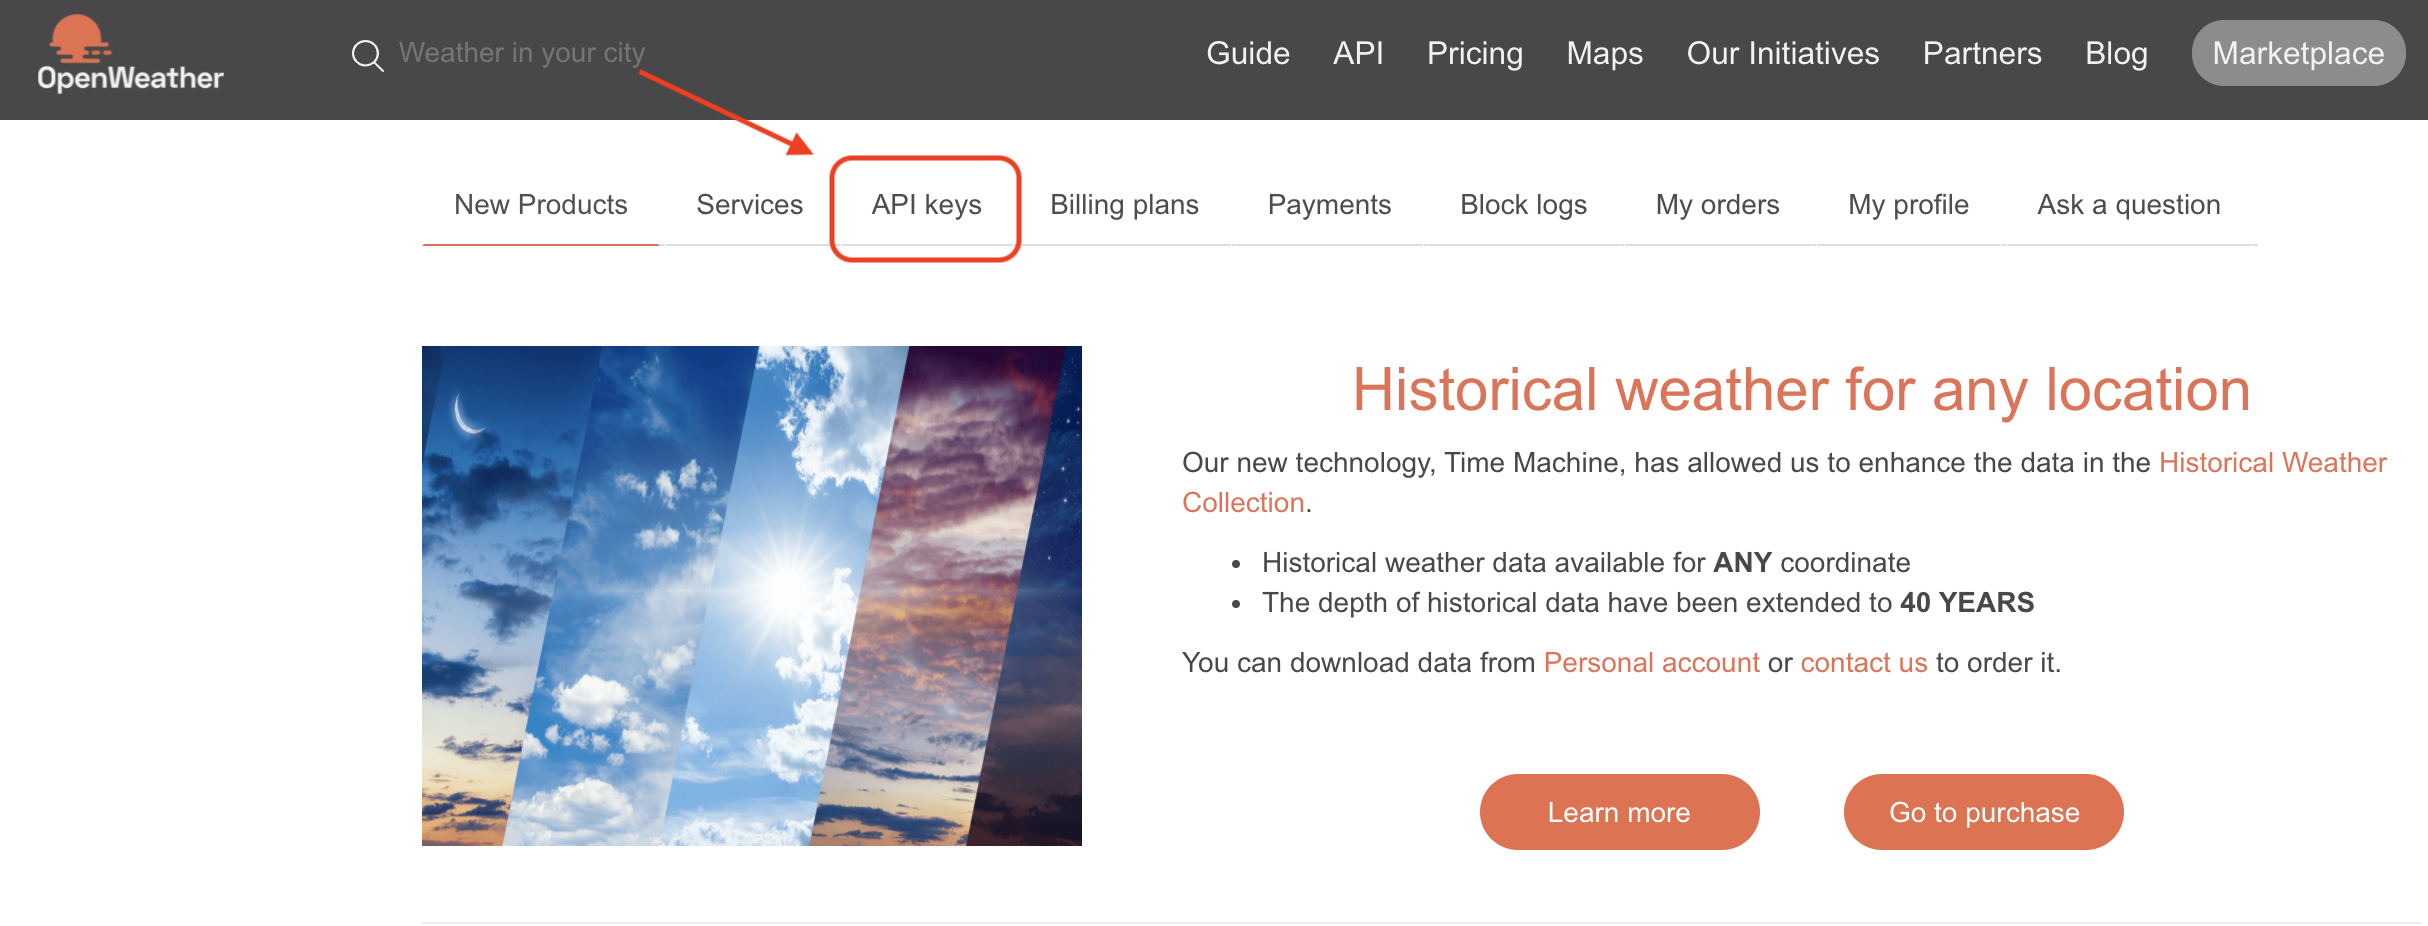

Once you click "API keys", you should be taken to a page that lists your API key:

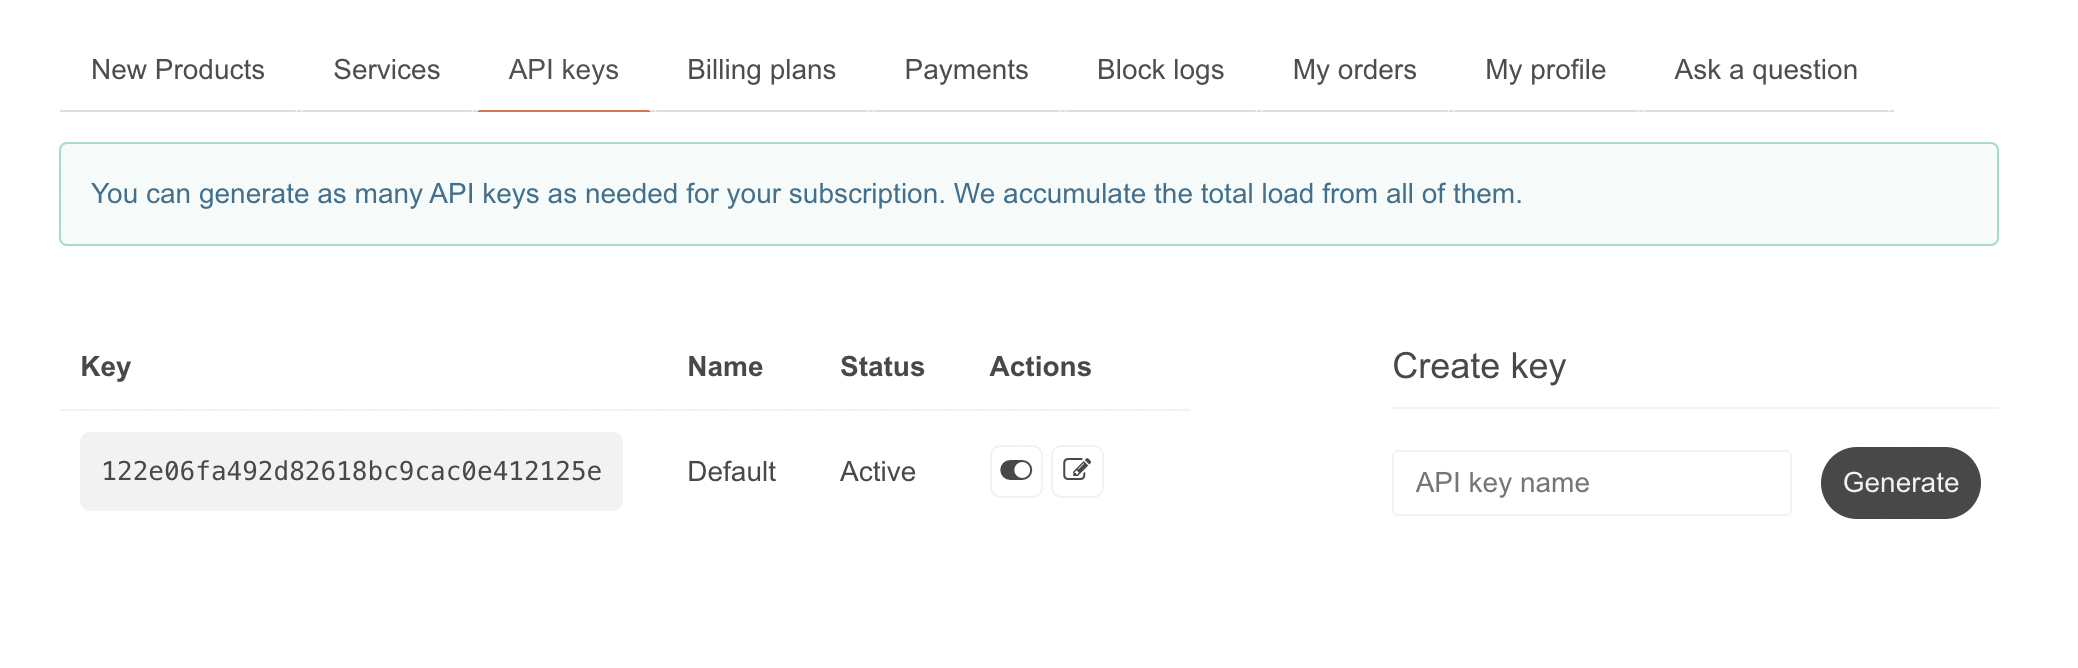

You need to include your API key in every API call that you make. It's a good idea to save your API key to a variable so that you don't need to rewrite it every time you need it. Copy your API key and paste it in the code cell below where it says "PUT_YOUR_API_KEY_HERE", then run that code cell.

## **2. Read the Documentation**

The first thing that we need to do is understand how to use the API, so let's take a look at the documentation.

Our goal is to get the current weather data for any ZIP code in the United States. 

From the home page, we can navigate to the documentation for openweathermap's current weather API by first clicking "API" (if you don't see "API", you may need to first click on an icon that looks like &#9776;):

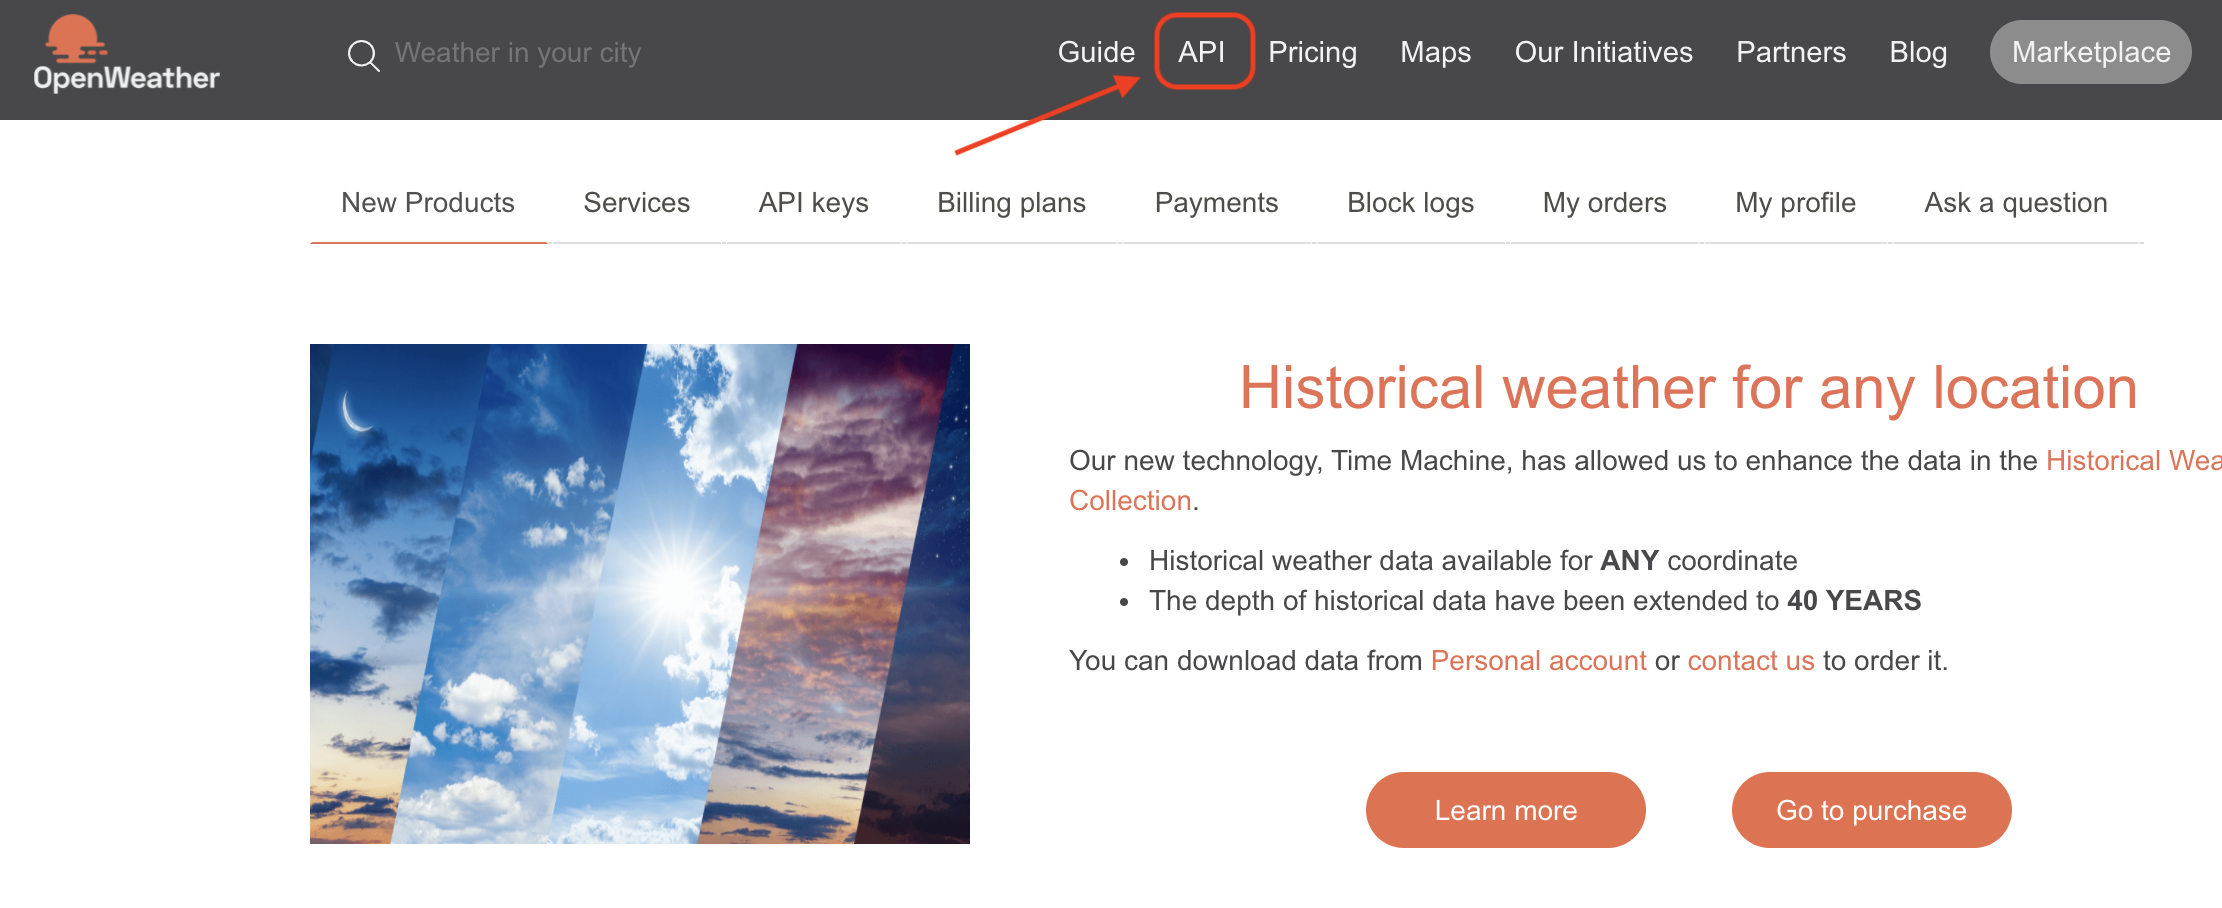

That should take you to a page like the one below, where you need to click "API doc" under the heading "Current Weather Data":

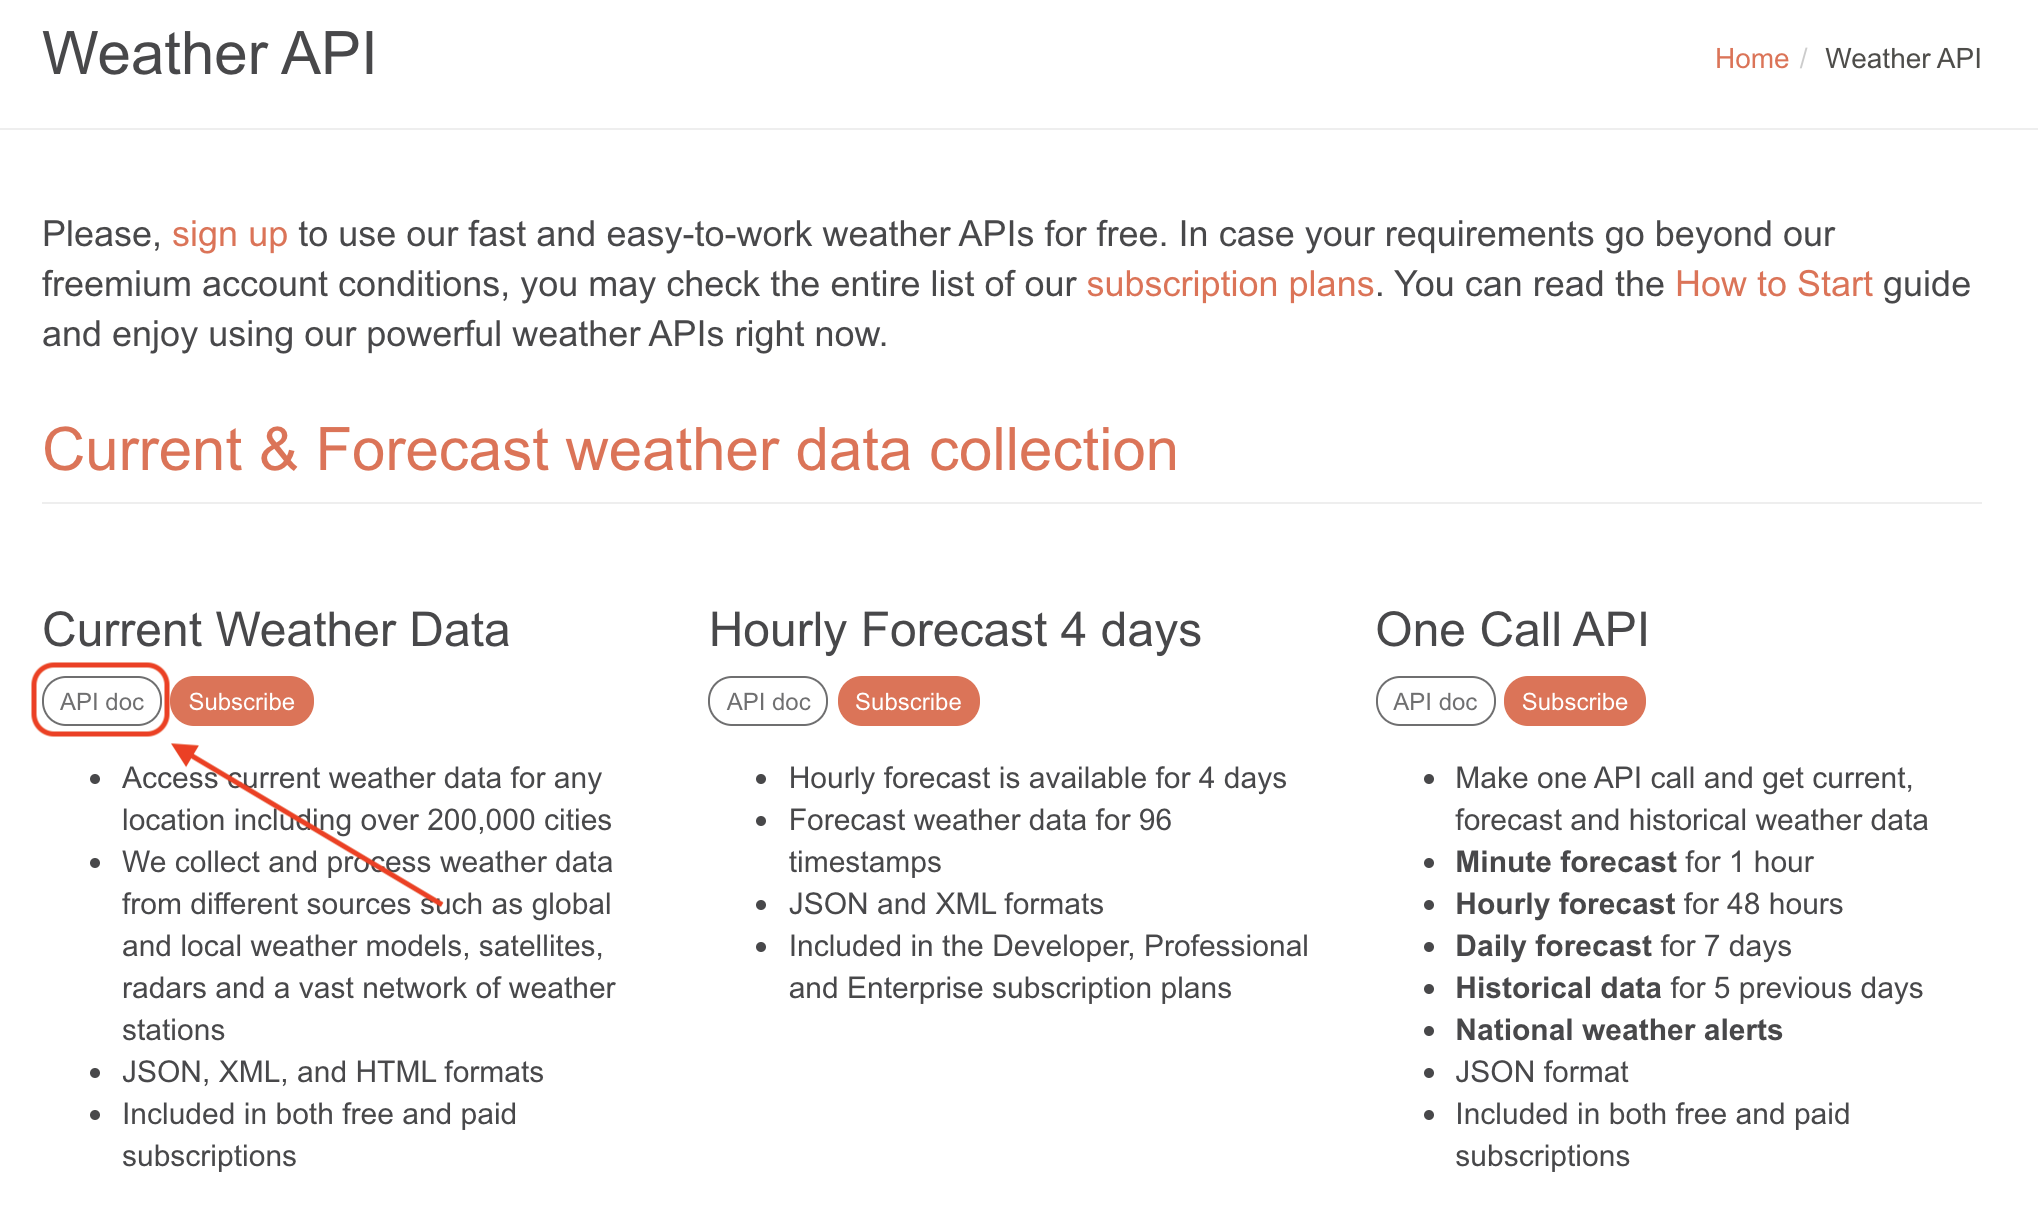

Since we want the current weather of a particular ZIP code, scroll down to the subheading "By ZIP code", which you can also find at the following link: https://openweathermap.org/current#zip

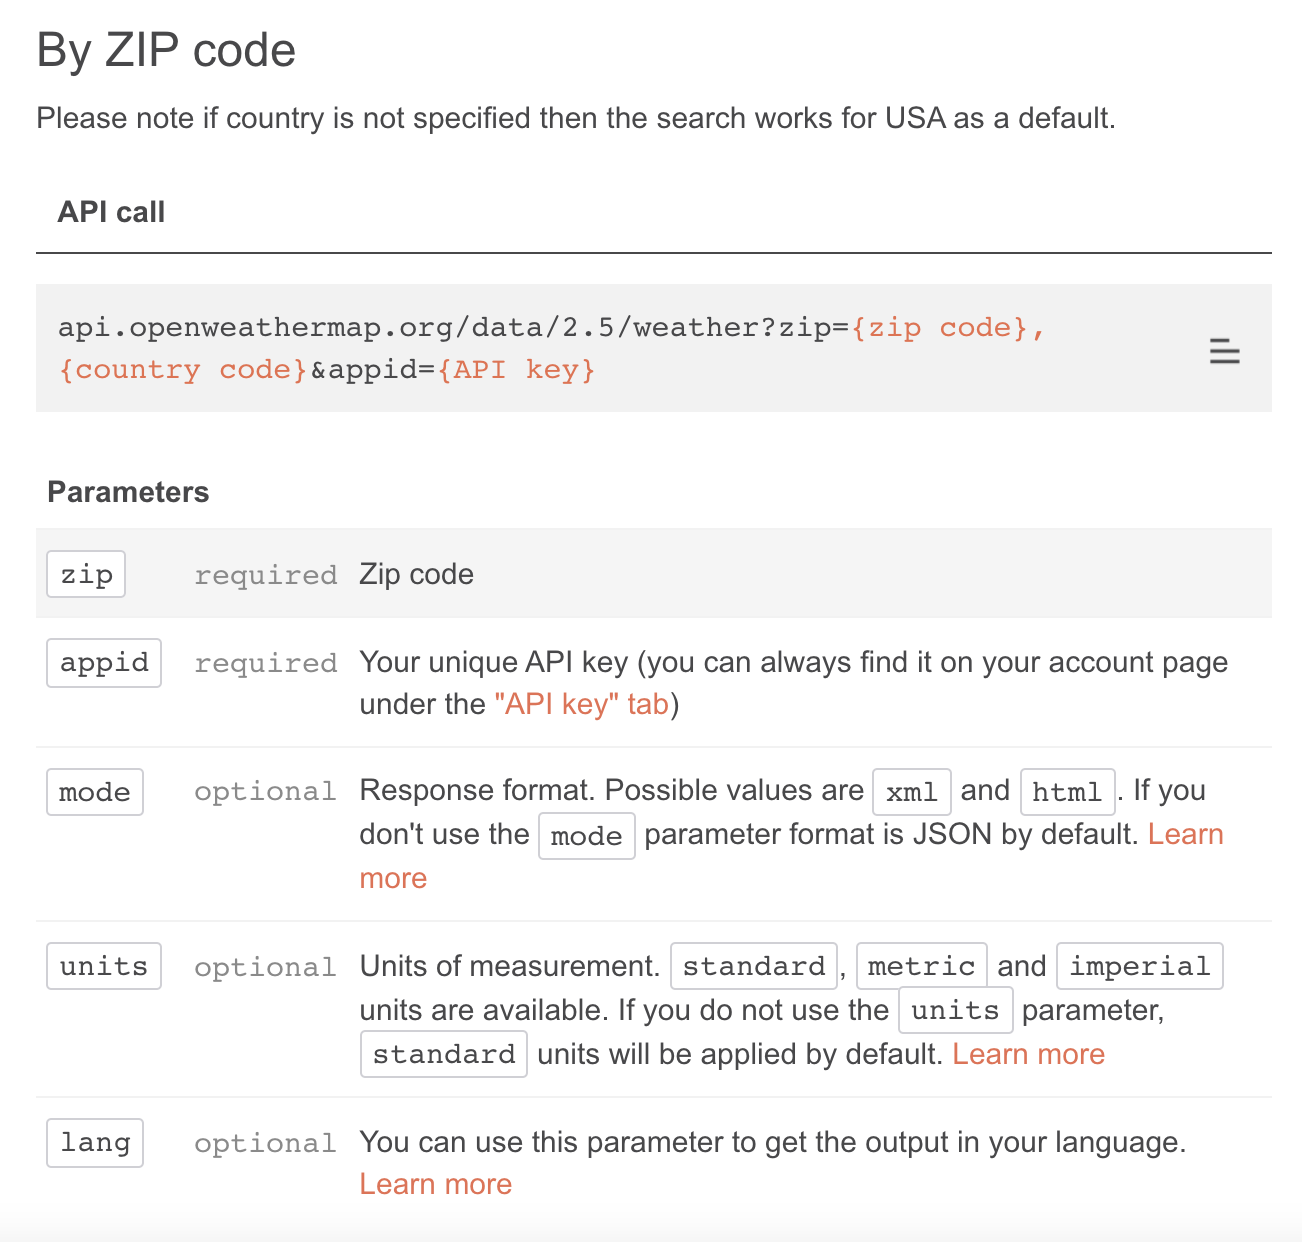

In order to call the API, we just need to go to the website listed under "API call" replacing "{zip code}" with an actual ZIP code and "{API key}" with your API key. 

Notice that, aside from "zip" and "appid", which are the ZIP code and your API key, there are a few optional parameters. One of these parameters is "units", which determines whether the temperature is measured in Kelvin, Celsius, or Fahrenheit. If you click "Learn More" in the row for "units", you will see that setting "units" to "imperial" will make your temperature appear in Fahrenheit. We can add this parameter to our API call by adding "&units=imperial" to the end of the URL.

Here is an example of calling the API from a browser to get the current weather in the ZIP code 11385 in Fahrenheit:

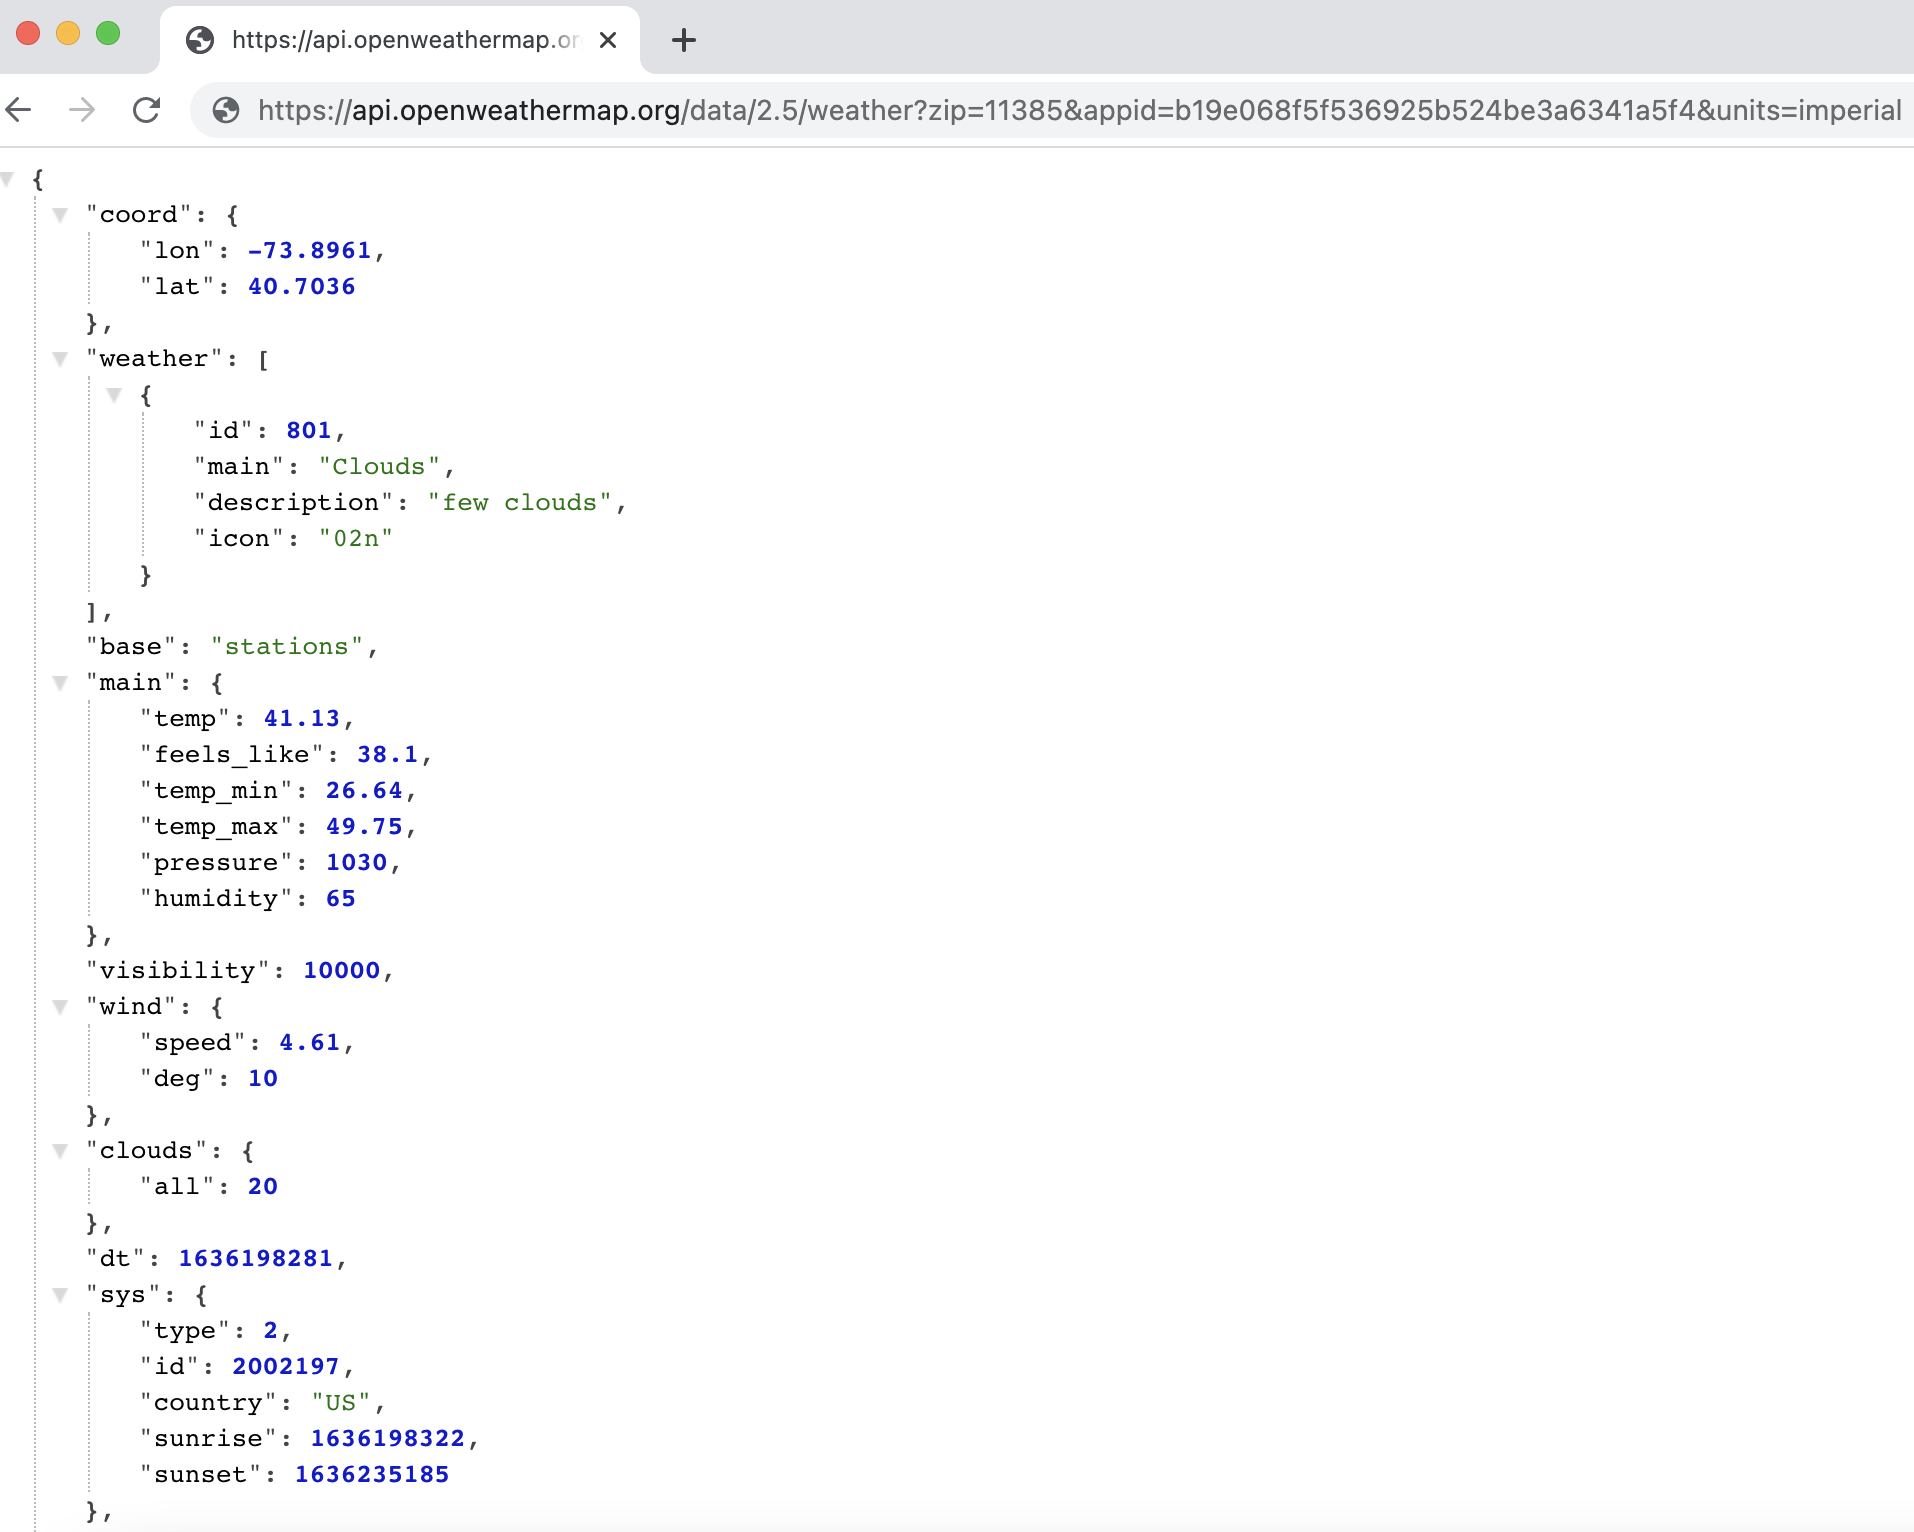

In [3]:
api_key = "a6af95fed2f18d65f3446214d6971151"

## **3. Call the API**

Before we call any API, in Python we will need to import 2 libraries into our code:

* `requests`: allows us to send HTTP requests to resources on the internet, like APIs!
* `json`: allows us to interact with and translate data in JSON format.

In [4]:
import requests
import json

The first step is to call the API! To do so, we use the `requests.get()` method to send a request to the API.

We then use `json.loads()` method to translate the JSON response we get from the API into a Python dictionary.

This API call gets the current temperature for the ZIP code 10016 in Fahrenheit:

In [5]:
# call the API
page = requests.get(f"https://api.openweathermap.org/data/2.5/weather?zip=10016&appid={api_key}&units=imperial")

# translate the JSON response into Python
weather_JSON = json.loads(page.content)

Now that we have the JSON data from our API call converted to a Python object, how can we extract the information we need from it?

## **4. Extract the Data**

Our goal is to get the following pieces of information:


1.   Current temperature
2.   Feels like temperature
3.   Minimum daily temperature
4.   Maximum daily temperature
5.   Humidity
6.   Description of weather conditions

Let's start with the current temperature. First, we need to locate the current temperature in the response:

In [6]:
# print out weather_JSON so we can locate the data we need to extract
print(weather_JSON)

{'coord': {'lon': -73.9781, 'lat': 40.7443}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 53.19, 'feels_like': 50.23, 'temp_min': 49.51, 'temp_max': 56.16, 'pressure': 1037, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1668018573, 'sys': {'type': 2, 'id': 2003558, 'country': 'US', 'sunrise': 1667993744, 'sunset': 1668030230}, 'timezone': -18000, 'id': 0, 'name': 'New York', 'cod': 200}


We see that the value for the current temperature is associated with the key "temp". The object containing the key "temp" is the value associated with the key "main". "main" is a key of the entire object, so this means that to access the current temperature, first we use the "main" key, then we use the "temp" key. 

In [7]:
curr_temp = weather_JSON["main"]["temp"]
print("Current temperature: ", curr_temp)

Current temperature:  53.19


Similarly, to get the feels-like temperature, we notice that that value is associated with the key "feels_like", and that the object containing the key "feels_like" is the value associated with the key "main". This means that to access the feels like temperature, first we use the "main" key, then we use the "feels_like" key.

In [14]:
# Get the "feels like" temperature from weather_JSON
# and print it out!
feels_like = weather_JSON['main']['feels_like']
print("Intuitive temperature: ", feels_like)

Intuitive temperature:  50.23


We can do the same for most of the other pieces of information we were looking for.

In [15]:
# Get the min temperature, max temperature, and humidity


min_temp = weather_JSON['main']['temp_min']
print("Lowest temperature: ", min_temp)

max_temp = weather_JSON['main']['temp_max']
print("Highest temperature: ", max_temp)

atmos = weather_JSON['main']['pressure']
print("Atmospheric pressure: ", atmos)

humid = weather_JSON['main']['humidity']
print("Wetness of my skin: ", humid)

Lowest temperature:  49.51
Highest temperature:  56.16
Atmospheric pressure:  1037
Wetness of my skin:  43


Obtaining the weather description is more complicated, but not by much. We notice that the weather description is the value associated with the key "description". The object with the key "description" is the first element of an array, so we will need to use the index 0 to access that object. That array is the value associated with the key "weather", and "weather" is a key of the entire object. This means that to access the weather description, we will need to use the key "weather", then the index 0, then the key "description".

In [ ]:
description = weather_JSON["weather"][0]["description"]
print("Description of current weather conditions: ", description)

With that, we have obtained all of the information we were looking for from the API response. To expand on this, we can write a function that takes in a ZIP code and returns a dictionary of all of the weather data we care about, which is what we do in the following code cell (this assumes that you've set the apiKey variable in [this code cell](#scrollTo=5qZD3wVg7k5i)).

In [ ]:
def get_weather_by_zip_code(zip_code):
    """
    Returns weather information for the zip code indicated by the argument

    zipCode should be a 5-digit string
    """
    page = requests.get(f"https://api.openweathermap.org/data/2.5/weather?zip={zip_code}&appid={api_key}&units=imperial")
    weather_JSON = json.loads(page.content)

    #current temp
    curr_temp = weather_JSON["main"]["temp"]

    #feels like temperature
    feels_like_temp = weather_JSON["main"]["feels_like"]

    #minimum daily temp
    min_temp = weather_JSON["main"]["temp_min"]

    #maximum daily temp
    max_temp = weather_JSON["main"]["temp_max"]

    #humidity
    humidity = weather_JSON["main"]["humidity"]

    #description
    description = weather_JSON["weather"][0]["description"]

    return {
        "curr_temp": curr_temp,
        "feels_like_temp": feels_like_temp,
        "min_temp": min_temp,
        "max_temp": max_temp,
        "humidity": humidity,
        "description": description
    }

In [ ]:
#here we test the above function with the ZIP code 11237
get_weather_by_zip_code("11237")

## **Places to Continue Learning**

* [Installing Python](https://realpython.com/installing-python/)
    * If you would like to run Python code without requiring an internet connection, you need to install it locally on your computer. This link contains great instructions on how to do that.
* [Automate the Boring Stuff with Python by Al Sweigart](https://automatetheboringstuff.com/)
    * This is a great book that shows how to write Python programs that perform useful and time-consuming tasks in a fraction of a second. One of the topics the author discusses is working with JSON data (Chapter 16), and he uses the same API that we used in this class.
* [JSON documentation](https://www.json.org/json-en.html)
* [Open Weather Map documentation to get current weather](https://openweathermap.org/current)



In addition to the above resources, NYPL offers free courses on Linkedin Learning to anyone with a library card. We recommend the following courses on that platform:
* Working with Databases
    1. [MySQL Installation and Configuration](https://www.linkedin.com/learning/mysql-installation-and-configuration/)
        * After obtaining data through an API, we may need some place to store that data. For that, we could use a database. MySQL is a free, popular database management system, and this course covers how to install and set it up.
    2. [Advanced Python: Working with Databases](https://www.linkedin.com/learning/advanced-python-working-with-databases)
        * Chapter 3 of this course covers how to use MySQL with Python.
    3. [MySQL Essential Training](https://www.linkedin.com/learning/mysql-essential-training-2?u=73722380)
        * This course covers how to use MySQL in general and also serves as a good introduction to SQL, the most common language used to communicate with databases.
* [Python Data Analysis](https://www.linkedin.com/learning/python-data-analysis-2/)
    * This is a course on data analysis in Python. It covers Python data structures like lists, tuples, dictionaries, and sets; great features in Python like comprehensions and the collections and itertools modules; and it spends a lot of time talking about numpy and pandas, which are great for dealing with data and doing math with it.
* [Python for Data Science Essential Training](https://www.linkedin.com/learning/python-for-data-science-essential-training-part-1/) 
    * This is a comprehensive course on data science in Python.